## Project 2 - Ames Housing Data and Kaggle Challenge - Attempt 8

### Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
# Adrian provided code to me that displays all the columns and rows
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

### Load and Clean Data

In [3]:
# Read in the Ames train data into a dataframe
ames_df = pd.read_csv('../datasets/train.csv')

In [4]:
# Check the first few rows of data
ames_df.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [5]:
# Check the null cell counts and datatypes of each column
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
# Check the % of null cells for each column
ames_df.isnull().mean().sort_values(ascending=False)

Pool QC            0.995612
Misc Feature       0.968308
Alley              0.931741
Fence              0.804973
Fireplace Qu       0.487567
Lot Frontage       0.160897
Garage Finish      0.055583
Garage Cond        0.055583
Garage Qual        0.055583
Garage Yr Blt      0.055583
Garage Type        0.055095
Bsmt Exposure      0.028279
BsmtFin Type 2     0.027304
BsmtFin Type 1     0.026816
Bsmt Cond          0.026816
Bsmt Qual          0.026816
Mas Vnr Type       0.010726
Mas Vnr Area       0.010726
Bsmt Half Bath     0.000975
Bsmt Full Bath     0.000975
Garage Cars        0.000488
Garage Area        0.000488
Bsmt Unf SF        0.000488
BsmtFin SF 2       0.000488
Total Bsmt SF      0.000488
BsmtFin SF 1       0.000488
Overall Cond       0.000000
Exterior 2nd       0.000000
Exterior 1st       0.000000
Roof Matl          0.000000
Roof Style         0.000000
Year Remod/Add     0.000000
Year Built         0.000000
SalePrice          0.000000
Overall Qual       0.000000
Land Contour       0

In [7]:
# Fill the null cells with 0 as a placeholder
[ames_df[c].fillna(0, inplace=True) for c in ames_df]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
# Take a look at the data statistics
round(ames_df.describe().T,0)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1474.0,844.0,1.0,754.0,1486.0,2198.0,2930.0
PID,2051.0,713590006.0,188691838.0,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,57.0,43.0,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,58.0,33.0,0.0,44.0,63.0,78.0,313.0
Lot Area,2051.0,10065.0,6742.0,1300.0,7500.0,9430.0,11514.0,159000.0
Overall Qual,2051.0,6.0,1.0,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,6.0,1.0,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1972.0,30.0,1872.0,1954.0,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1984.0,21.0,1950.0,1964.0,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,99.0,174.0,0.0,0.0,0.0,159.0,1600.0


In [9]:
# Create a new column for the total number of baths in the listing
ames_df['total_baths'] = ames_df['Bsmt Full Bath'] + ames_df['Bsmt Half Bath']/2 +\
                              ames_df['Full Bath'] + ames_df['Half Bath']/2

In [10]:
# Create a new column for the total square feet of outdoor living space
ames_df['total_out'] = ames_df['Wood Deck SF'] + ames_df['Open Porch SF'] + \
                                ames_df['Enclosed Porch'] + ames_df['3Ssn Porch'] + \
                                ames_df['Screen Porch']

In [11]:
# Create a new column for common rooms
ames_df['common_room'] = ames_df['TotRms AbvGrd'] - \
                             (ames_df['Kitchen AbvGr'] + ames_df['Bedroom AbvGr'])

In [12]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

poly_features = [
            'Overall Qual', 
            'Gr Liv Area', 
            'Garage Cars', 
            'total_baths', 
            'Year Remod/Add', 
            'Total Bsmt SF',
            'common_room', 
            'total_out', 
            'Lot Area', 
            'Fireplaces'
                ]

# Create X_poly
X_poly = poly.fit_transform(ames_df[poly_features])
# Change X_poly into a dataframe
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(poly_features))

In [13]:
# Add columns to the X_poly dataframe that I want to convert to dummies
X_poly = X_poly.join(ames_df[['SalePrice', 'MS Zoning', 'Neighborhood']])

In [14]:
# Create dummies for the categorical columns I want to include in features that I think will 
# have an affect on SalePrice
with_dummies = pd.get_dummies(X_poly, columns=['MS Zoning', 'Neighborhood'], drop_first=True)
with_dummies.head().T

,0,1,2,3,4
Overall Qual,6.000000e+00,7.000000e+00,5.0,5.00,6.0
Gr Liv Area,1.479000e+03,2.122000e+03,1057.0,1444.00,1445.0
Garage Cars,2.000000e+00,2.000000e+00,1.0,2.00,2.0
total_baths,2.500000e+00,3.500000e+00,2.0,2.50,2.0
Year Remod/Add,2.005000e+03,1.997000e+03,2007.0,2007.00,1993.0
Total Bsmt SF,7.250000e+02,9.130000e+02,1057.0,384.00,676.0
common_room,2.000000e+00,3.000000e+00,1.0,3.00,2.0
total_out,4.400000e+01,7.400000e+01,52.0,100.00,59.0
Lot Area,1.351700e+04,1.149200e+04,7922.0,9802.00,14235.0
Fireplaces,0.000000e+00,1.000000e+00,0.0,0.00,0.0


In [15]:
# Create a new column for the log of SalePrice based on Adrian's suggestion. Have to use .exp for the predictions
with_dummies['SalePrice_log'] = np.log(with_dummies['SalePrice'])

In [16]:
# Check to see if the new columns look correct
with_dummies.head().T

,0,1,2,3,4
Overall Qual,6.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
Gr Liv Area,1.479000e+03,2.122000e+03,1.057000e+03,1.444000e+03,1.445000e+03
Garage Cars,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
total_baths,2.500000e+00,3.500000e+00,2.000000e+00,2.500000e+00,2.000000e+00
Year Remod/Add,2.005000e+03,1.997000e+03,2.007000e+03,2.007000e+03,1.993000e+03
Total Bsmt SF,7.250000e+02,9.130000e+02,1.057000e+03,3.840000e+02,6.760000e+02
common_room,2.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00
total_out,4.400000e+01,7.400000e+01,5.200000e+01,1.000000e+02,5.900000e+01
Lot Area,1.351700e+04,1.149200e+04,7.922000e+03,9.802000e+03,1.423500e+04
Fireplaces,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [17]:
# Calculate the correlation of the different columns to SalePrice_log
with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending = False)

,SalePrice_log
SalePrice_log,1.000000
SalePrice,0.946134
Overall Qual Year Remod/Add,0.827212
Overall Qual,0.822774
Overall Qual^2,0.812051
Overall Qual total_baths,0.809873
Overall Qual Garage Cars,0.808991
Overall Qual Gr Liv Area,0.805705
Gr Liv Area Garage Cars,0.765163
Garage Cars total_baths,0.749154


<IPython.core.display.Javascript object>


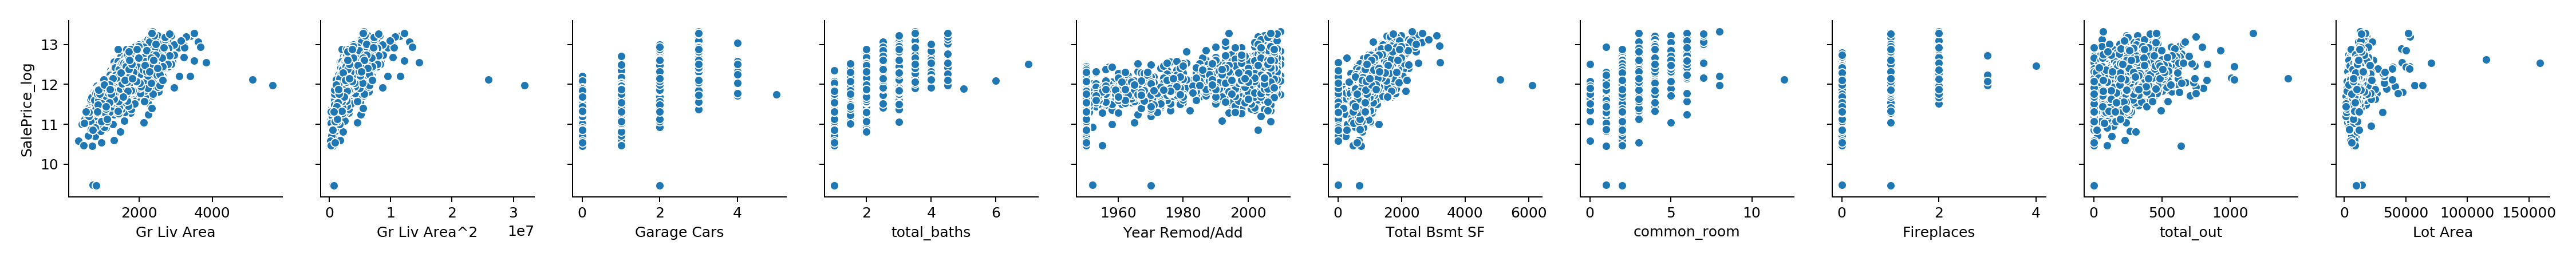

In [51]:
sns.pairplot(with_dummies, y_vars=['SalePrice_log'], x_vars=['Gr Liv Area', 
                                                             'Gr Liv Area^2', 
                                                             'Garage Cars', 
                                                             'total_baths', 
                                                             'Year Remod/Add', 
                                                             'Total Bsmt SF',
                                                             'common_room', 
                                                             'Fireplaces', 
                                                             'total_out', 
                                                             'Lot Area']);

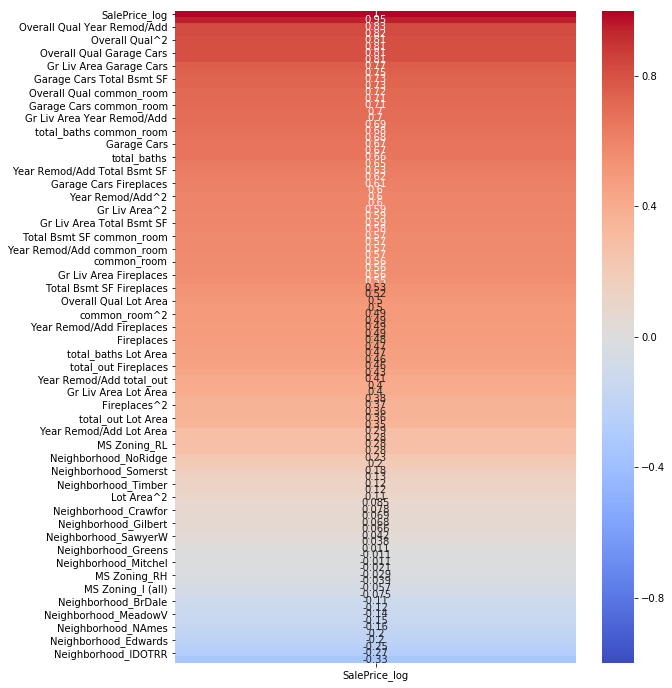

In [18]:
# Generate a heatmap of the correlation of the different columns to SalePrice_log
plt.figure(figsize = (9, 12))
sns.heatmap(with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending=False), annot=True, 
            cmap='coolwarm', vmin=-1);

<IPython.core.display.Javascript object>


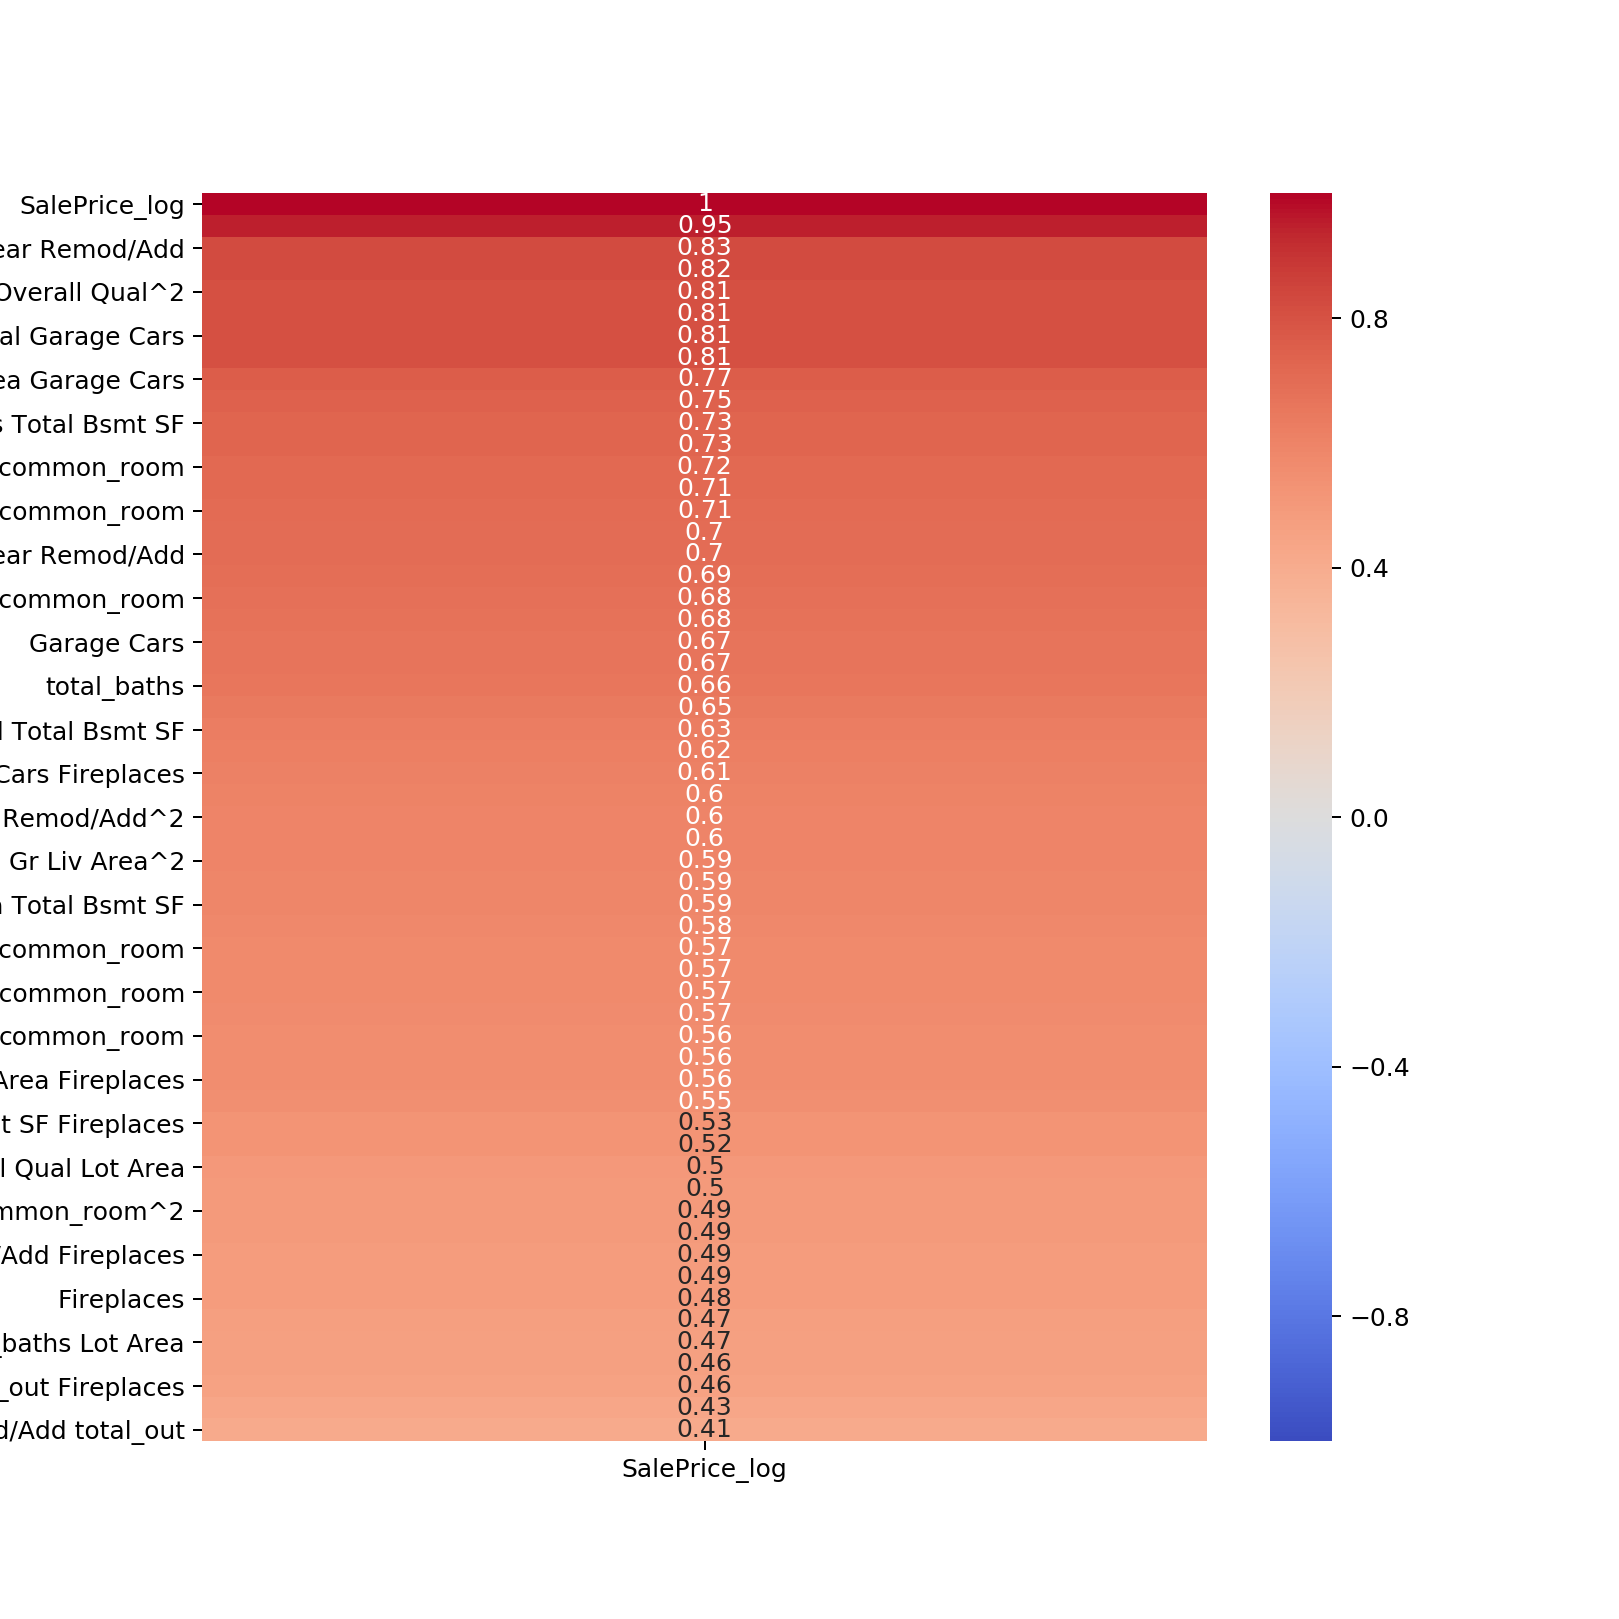

In [49]:
# Create a heatmap with a subset of columns that have greater than 0.3 or less than -0.3 correlation
# so that the heatmap isn't so crowded.

corr_sub = with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending = False)
plt.figure(figsize = (9, 9))
sns.heatmap(corr_sub[(corr_sub['SalePrice_log'] > .4) | (corr_sub['SalePrice_log'] < -.4)], annot=True, 
            cmap='coolwarm', vmin=-1);

In [20]:
# Create X and y
X = with_dummies.drop(columns=['SalePrice_log', 'SalePrice'])
y = with_dummies['SalePrice_log']

# Train/test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale the data
ss = StandardScaler()
ss.fit(X_train) 
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) 

In [21]:
# Instantiate 3 models
lr = LinearRegression()
lasso = LassoCV(cv=5, max_iter=10000)
ridge = RidgeCV()

In [22]:
# Check the score of the three models
print(f'Linear Regression: {cross_val_score(lr, X_train_sc, y_train, cv=5).mean()}')
print(f'Lasso: {cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()}')
print(f'Ridge: {cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()}')

Linear Regression: 0.8562380233869735
Lasso: 0.8742840730440303
Ridge: 0.8741516433927083


In [23]:
# Lasso appears to be the best model. Fit the lasso model
lasso.fit(X_train_sc, y_train)

# Score the model
lasso.score(X_train_sc, y_train)

C:\Users\tengw\Anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019920353952763037, tolerance: 0.019620355138859034
  tol, rng, random, positive)


0.8947978791797093

In [24]:
# Score the model with test data
lasso.score(X_test_sc, y_test)

0.8477030608517018

In [25]:
# Since the train and test scores are fairly close, bias and variance appear to be at the optimal range

In [26]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.8742840730440303

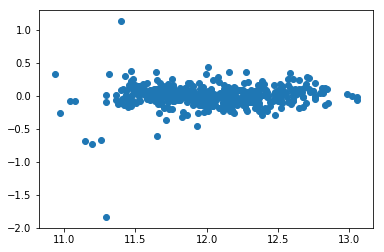

In [27]:
# Plot the predictions against the residuals to check for heteroscedasticity 
pred = lasso.predict(X_test_sc)
residuals = y_test - pred
plt.scatter(pred, residuals);

In [28]:
residuals.sort_values()

1628   -1.836997
1309   -0.735730
1292   -0.682580
408    -0.665916
162    -0.608331
353    -0.448522
1655   -0.364998
1270   -0.316074
429    -0.290837
1433   -0.287133
393    -0.282083
1131   -0.264589
1089   -0.259036
1694   -0.256487
1427   -0.251794
534    -0.243546
163    -0.241891
2      -0.238067
966    -0.237864
67     -0.235413
1900   -0.232927
743    -0.231041
1420   -0.225589
1106   -0.224995
1613   -0.222776
836    -0.219590
886    -0.205180
1665   -0.197004
344    -0.195682
857    -0.192208
1449   -0.190391
1988   -0.189547
49     -0.186411
1001   -0.185809
1688   -0.182133
1719   -0.179320
374    -0.178848
1612   -0.176350
1605   -0.174923
561    -0.170283
73     -0.169898
382    -0.169178
1318   -0.167024
298    -0.166769
168    -0.162586
1735   -0.160322
306    -0.157905
990    -0.154198
1288   -0.148135
483    -0.146390
617    -0.146013
1083   -0.145058
175    -0.144040
710    -0.143435
218    -0.142454
292    -0.142124
939    -0.141182
746    -0.140714
1452   -0.1400

In [29]:
# The plots look evenly distributed, with a few outliers. Doesn't appear to be a pattern, so homoscedastic.

In [30]:
# Calculate the root mean squared
rss = (residuals ** 2).sum()
np.sqrt(rss/ len(pred))

0.16509608432906084

In [31]:
# Fit the model on the entire dataset
# Scale the data
ss = StandardScaler()
ss.fit(X) 
X_sc = ss.transform(X)

# Fit the model
lasso.fit(X_sc, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [32]:
# Read in the Ames test data into a dataframe
ames_test = pd.read_csv('../datasets/test.csv')

In [33]:
# Check the first few rows of data
ames_test.head().T

,0,1,2,3,4
Id,2658,2718,2414,1989,625
PID,902301120,905108090,528218130,902207150,535105100
MS SubClass,190,90,60,30,20
MS Zoning,RM,RL,RL,RM,RL
Lot Frontage,69,NaN,58,60,NaN
Lot Area,9142,9662,17104,8520,9500
Street,Pave,Pave,Pave,Pave,Pave
Alley,Grvl,NaN,NaN,NaN,NaN
Lot Shape,Reg,IR1,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [34]:
# Fill the null cells with 0 as a placeholder
[ames_test[c].fillna(0, inplace=True) for c in ames_test]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [35]:
# Create a new column for the total number of baths in the listing
ames_test['total_baths'] = ames_test['Bsmt Full Bath'] + ames_test['Bsmt Half Bath']/2 +\
                              ames_test['Full Bath'] + ames_test['Half Bath']/2

In [36]:
# Create a new column for the total square feet of outdoor living space
ames_test['total_out'] = ames_test['Wood Deck SF'] + ames_test['Open Porch SF'] + \
                                ames_test['Enclosed Porch'] + ames_test['3Ssn Porch'] + \
                                ames_test['Screen Porch']

In [37]:
# Create a new column for common rooms
ames_test['common_room'] = ames_test['TotRms AbvGrd'] - \
                             (ames_test['Kitchen AbvGr'] + ames_test['Bedroom AbvGr'])

In [38]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

# Create test_X_poly
test_X_poly = poly.fit_transform(ames_test[poly_features])
# Change X_poly into a dataframe
test_X_poly = pd.DataFrame(test_X_poly, columns=poly.get_feature_names(poly_features))

In [39]:
# Add columns to the X_poly dataframe that I want to convert to dummies
test_X_poly = test_X_poly.join(ames_test[['MS Zoning', 'Neighborhood']])

In [40]:
# Create dummies for the categorical columns I want to include in features that I think will 
# have an affect on SalePrice
test_with_dummies = pd.get_dummies(test_X_poly, columns=['MS Zoning', 'Neighborhood'], drop_first=True)
test_with_dummies.head().T

,0,1,2,3,4
Overall Qual,6.0,5.0,7.000000e+00,5.0,6.00
Gr Liv Area,1928.0,1967.0,1.496000e+03,968.0,1394.00
Garage Cars,1.0,2.0,2.000000e+00,2.0,2.00
total_baths,2.0,2.0,3.500000e+00,1.0,2.50
Year Remod/Add,1950.0,1977.0,2.006000e+03,2006.0,1963.00
Total Bsmt SF,1020.0,1967.0,6.540000e+02,968.0,1394.00
common_room,3.0,2.0,3.000000e+00,2.0,2.00
total_out,172.0,170.0,1.240000e+02,184.0,261.00
Lot Area,9142.0,9662.0,1.710400e+04,8520.0,9500.00
Fireplaces,0.0,0.0,1.000000e+00,0.0,2.00


In [41]:
test_with_dummies.head().T

,0,1,2,3,4
Overall Qual,6.0,5.0,7.000000e+00,5.0,6.00
Gr Liv Area,1928.0,1967.0,1.496000e+03,968.0,1394.00
Garage Cars,1.0,2.0,2.000000e+00,2.0,2.00
total_baths,2.0,2.0,3.500000e+00,1.0,2.50
Year Remod/Add,1950.0,1977.0,2.006000e+03,2006.0,1963.00
Total Bsmt SF,1020.0,1967.0,6.540000e+02,968.0,1394.00
common_room,3.0,2.0,3.000000e+00,2.0,2.00
total_out,172.0,170.0,1.240000e+02,184.0,261.00
Lot Area,9142.0,9662.0,1.710400e+04,8520.0,9500.00
Fireplaces,0.0,0.0,1.000000e+00,0.0,2.00


In [42]:
# Add placeholder columns for features not found in Ames_test dataset
test_with_dummies['Neighborhood_GrnHill'] = 0
test_with_dummies['Neighborhood_Landmrk'] = 0
test_with_dummies['MS Zoning_C (all)'] = 0

In [43]:
# Create X for Ames_test
test_X = test_with_dummies

# Scale the data
ss.fit(test_X) 
test_X_sc = ss.transform(test_X)

In [44]:
# Run the lasso model on the Ames_test data
test_with_dummies['SalePrice_log'] = lasso.predict(test_X_sc)

In [45]:
# Convert the 'SalesPrice_log' back to 'SalesPrice' by using .exp
test_with_dummies['SalePrice'] = np.exp(test_with_dummies['SalePrice_log'])

In [46]:
# Create new dataframe for the submission file
sub_df = pd.DataFrame(columns=['Id', 'SalePrice'])
sub_df['Id'] = ames_test['Id']
sub_df['SalePrice'] = test_with_dummies['SalePrice']
sub_df

,Id,SalePrice
0,2658,173147.196380
1,2718,171030.955023
2,2414,185999.553254
3,1989,156807.955999
4,625,170301.786070
5,333,138683.252957
6,1327,134215.372590
7,858,138773.090669
8,95,160911.117207
9,1568,155469.798342


In [47]:
# Save the submission dataframe to a .csv file
sub_df.to_csv('../datasets/submission8_lasso.csv', index=False)

## Results
Generated a score of 54873.84424 in the Kaggle competition, which is much worse. Used PolynomialFeatures to fit the model.